<a href="https://colab.research.google.com/github/Medissaoui07/fashion_mnist_classification-using-TensorFlow-Keras/blob/main/fashion_mnist_classification_using_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates a simple neural network trained on the Fashion MNIST dataset for image classification. It uses TensorFlow and Matplotlib for data manipulation and visualization.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import  keras

import numpy as np
import matplotlib.pyplot as plt



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


The Fashion MNIST dataset consists of 60,000 training images and 10,000 testing images, each labeled with one of 10 classes representing fashion items.

In [ ]:
# load dataset
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
train_labels.shape
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

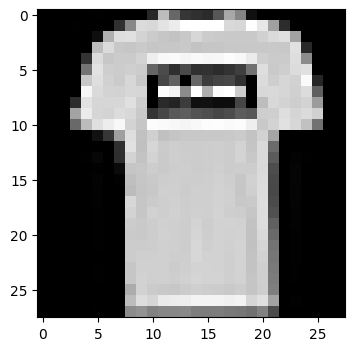

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(train_images[1], cmap='gray')
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

The model is a feedforward neural network with two dense layers:
- Input layer: Flatten layer to convert 28x28 images to 1D arrays
- Hidden layer: Dense layer with 200 units and ReLU activation function
- Output layer: Dense layer with 10 units (one for each class) and softmax activation function

In [ ]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(200,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model is trained using the Adam optimizer and sparse categorical cross-entropy loss function. It's trained for 10 epochs on the training data.

In [ ]:
model.fit(train_images , train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4899 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3671 - accuracy: 0.8684
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3308 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3110 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2888 - accuracy: 0.8943
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2744 - accuracy: 0.8991
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2630 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2509 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2408 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

The trained model's performance is evaluated on the test data using accuracy as the metric.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8777
Test accuracy: 0.8776999711990356


The model makes predictions on new data from the test set, and some sample predictions are displayed along with the corresponding images.

In [ ]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


 Utility Functions
- `predict(model, image, correct_label)`: Predicts the class label for a given image and displays the prediction along with the correct label.
- `show_image(img, label, guess)`: Displays the image along with its correct label and predicted label.
- `get_number()`: Utility function to interactively pick a number for prediction.


Pick a number: 5
1/1 [==============================] - 0s 24ms/step
Excpected: Trouser
Guess: Trouser


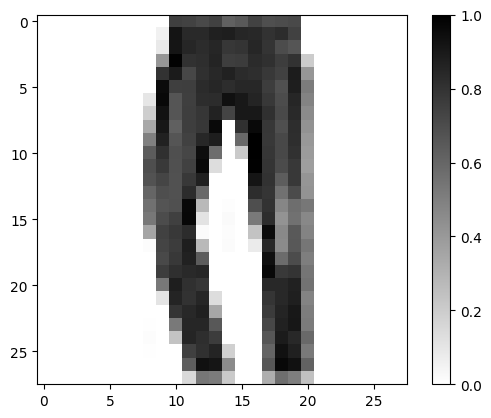

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  print("Excpected: " + label)
  print("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


 Usage
1. Install dependencies: `pip install tensorflow matplotlib`
2. Run the script: ` fashion_mnist_classification.py`
3. Follow the prompts to interactively view predictions.
